# Transcriptomics
## Log Transformations and DEG analysis

By: Caroline Labelle
<br>For: BCM6065-65

<br>
Date: July  8th 2021

<hr style="border:1px solid black"> </hr>


In [3]:
Name:Ariane Duarte Rosse

SyntaxError: invalid syntax (<ipython-input-3-896c1af3e1d4>, line 1)

## Prepping the data

To do the DEG analysis, we will be using a R package called Limma Voom. We first need to prep our data so that we have a single file to upload in R.

You were initially handed 6 unstranded RNA-seq samples of MCF7 cells (breast cancer): three of the samples were threated with estradiol (E2). You used STAR to align the reads and do the gene quantification. You now have 6 files with the suffix <code>ReadsPerGene.out.tab</code>.

SRR1012918 -> **treatment**<br>
SRR1012920 -> **treatment**<br>
SRR1012922 -> **treatment**<br>

SRR1012936 -> **control**<br>
SRR1012939 -> **control**<br>
SRR1012942 -> **control**<br>

Publication for the data: https://pubmed.ncbi.nlm.nih.gov/24319002/
<br>STAR documentation: https://physiology.med.cornell.edu/faculty/skrabanek/lab/angsd/lecture_notes/STARmanual.pdf

In [5]:
### Import pandas, numpy and seaborn
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [6]:
sns.set(rc={'figure.figsize':(9, 4)})
sns.set_theme(context="notebook", style="white", palette="Set2")

In [7]:
!ls -1

breast_cancer_metametric.tsv
data_science_1.ipynb
deg_analysis1.ipynb
deg_analysis1.R.ipynb
deg_analysis.ipynb
deg_analysis.R
DEG_analysis_results.tsv
exercises_1.ipynb
gene_count.tsv
iris.tsv
kmers.tsv
Part_1-student.ipynb
Part_2-student.ipynb
R
sepal_length.pdf
seq_100.txt
STAR_SRR1012918ReadsPerGene.out.tab
STAR_SRR1012920ReadsPerGene.out.tab
STAR_SRR1012922ReadsPerGene.out.tab
STAR_SRR1012936ReadsPerGene.out.tab
STAR_SRR1012939ReadsPerGene.out.tab
STAR_SRR1012942ReadsPerGene.out.tab
test2.cv
test_csv
Untitled.ipynb


In [8]:
### Import one DF
fn="STAR_SRR1012918ReadsPerGene.out.tab"
data = pd.read_csv(fn,sep="\t",names=["Genes", "Treatment1", "stranded1", "stranded2"])

In [9]:
data

,Genes,Treatment1,stranded1,stranded2
0,N_unmapped,4211944,4211944,4211944
1,N_multimapping,0,0,0
2,N_noFeature,812921,9187413,9390931
3,N_ambiguous,1484530,410100,369058
4,ENSG00000223972,1,1,0
...,...,...,...,...
60674,ENSG00000271254,209,98,111
60675,ENSG00000275405,0,0,0
60676,ENSG00000275987,0,0,0
60677,ENSG00000277475,0,0,0


In [10]:
### Keep gene rows and stranded counts
data=data.iloc[4:60679,0:2]
data.head()

,Genes,Treatment1
4,ENSG00000223972,1
5,ENSG00000227232,1
6,ENSG00000278267,0
7,ENSG00000243485,0
8,ENSG00000284332,0


In [11]:
### Import all data into one DF
fn_list = ["STAR_SRR1012920ReadsPerGene.out.tab","STAR_SRR1012922ReadsPerGene.out.tab","STAR_SRR1012936ReadsPerGene.out.tab","STAR_SRR1012939ReadsPerGene.out.tab","STAR_SRR1012942ReadsPerGene.out.tab"]

label_list = ["Treatment2","Treatment3", "Control1","Control2","Control3"]

for i in range(len(fn_list)): 
#fn_tmp="STAR_SRR1012920ReadsPerGene.out.tab"
    fn_tmp =fn_list[i]
    data_tmp = pd.read_csv(fn_tmp,sep="\t",names=["Genes", label_list[i], "stranded1", "stranded2"])
    data_tmp=data_tmp.iloc[4:60679,0:2]

    data = data.merge(data_tmp, on="Genes")
    
    

In [12]:
data.head()

,Genes,Treatment1,Treatment2,Treatment3,Control1,Control2,Control3
0,ENSG00000223972,1,0,0,0,0,0
1,ENSG00000227232,1,0,0,1,0,1
2,ENSG00000278267,0,0,0,0,0,0
3,ENSG00000243485,0,0,0,0,0,0
4,ENSG00000284332,0,0,0,0,0,0


In [13]:
### Export the dataframe to a tsv
data.to_csv("gene_count.tsv",sep="\t", header=True, index=False)

## Explore the data

In [14]:
### Calculate the average ratio of Treatment1 vs. Control1
### Is there a problem?
(data.Treatment1/data.Control1)

0             inf
1        1.000000
2             NaN
3             NaN
4             NaN
           ...   
60670    1.161111
60671         NaN
60672         NaN
60673         NaN
60674         NaN
Length: 60675, dtype: float64

In [15]:
### Calculate the average log10 ratio of Treatment1 vs. Control1
(np.log10(data.Treatment1+0.01)-np.log10(data.Control1+0.01)).mean()

0.05458222350956533

In [16]:
### Add columns to the df with log10-transformed data
#col_list=["Treatment1_log10","Treatment2_log10","Control1_log10","Control2_log10","Control3_log10"]

#Alternative 1
#T1log=np.log10(data.Treatment1+0.01)
#T2log=np.log10(data.Treatment2+0.01)
#C1log=np.log10(data.Control1+0.01)
#C2log=np.log10(data.Control2+0.01)
#C3log=np.log10(data.Control3+0.01)

In [17]:
#data["Treatment1_log10"]=T1log
#data["Treatment2_log10"]=T2log
#data["Control1_log10"]=C1log
#data["Control2_log10"]=C2log
#data["Control3_log10"]=C3log

In [18]:
#data.head()

In [19]:
### Add columns to the df with log10-transformed data
##Alternative 2
col_list=["Treatment1_log10","Treatment2_log10","Control1_log10","Control2_log10","Control3_log10"]

for i in range(len(col_list)):
    data[col_list[i]]=np.log10(data.iloc[:,i+1]+0.01)
    
data.head()

,Genes,Treatment1,Treatment2,Treatment3,Control1,Control2,Control3,Treatment1_log10,Treatment2_log10,Control1_log10,Control2_log10,Control3_log10
0,ENSG00000223972,1,0,0,0,0,0,0.004321,-2.0,-2.0,-2.000000,-2.0
1,ENSG00000227232,1,0,0,1,0,1,0.004321,-2.0,-2.0,0.004321,-2.0
2,ENSG00000278267,0,0,0,0,0,0,-2.000000,-2.0,-2.0,-2.000000,-2.0
3,ENSG00000243485,0,0,0,0,0,0,-2.000000,-2.0,-2.0,-2.000000,-2.0
4,ENSG00000284332,0,0,0,0,0,0,-2.000000,-2.0,-2.0,-2.000000,-2.0


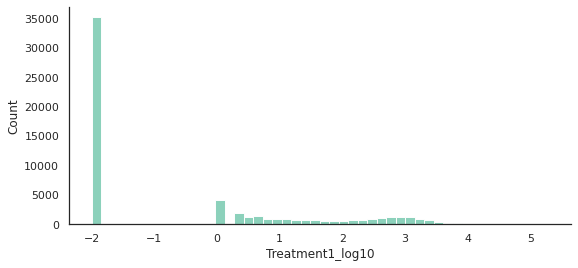

In [20]:
### Plot a control and a treament distribution of the expression values
sns.histplot(data, x="Treatment1_log10")
sns.despine()

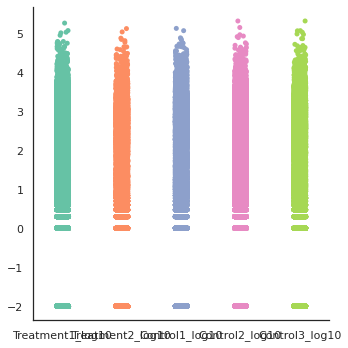

In [21]:
### Plot the log10 expression values of all samples
### What do you observe?
data_tmp = data[col_list]
sns.catplot(data=data_tmp)
sns.despine()

## DEG analysis

In [22]:
### Upload DEG analysis
deg_data = pd.read_csv("DEG_analysis_results.tsv",sep="\t", header=0)
deg_data.head()

,genes,logFC,AveExpr,t,P.Value,adj.P.Val,B
0,ENSG00000147255,-4.212719,5.036796,-32.540700,1.016408e-07,0.001858,8.565757
1,ENSG00000151892,-2.530967,5.702625,-31.925158,1.133285e-07,0.001858,8.615937
2,ENSG00000213673,-4.730086,-2.601906,-31.415734,1.242076e-07,0.001858,5.558399
3,ENSG00000074527,1.339166,7.366807,31.233154,1.284020e-07,0.001858,8.644275
4,ENSG00000151224,-5.105304,-2.408434,-29.574816,1.752000e-07,0.001858,5.565237


In [23]:
##number of genes with significant p-values adj.p.values <0.05
############20 genes with the higher value 

pval_subset=deg_data[deg_data.loc[:,"adj.P.Val"] <= 0.05]
#see gene with significant p-values 
#pval_subset.head()

In [24]:
logFC_subset =pval_subset[np.abs(pval_subset.loc[:,"logFC"])>=3.0]

#see logFC genes 
logFC_subset.head()

,genes,logFC,AveExpr,t,P.Value,adj.P.Val,B
0,ENSG00000147255,-4.212719,5.036796,-32.540700,1.016408e-07,0.001858,8.565757
2,ENSG00000213673,-4.730086,-2.601906,-31.415734,1.242076e-07,0.001858,5.558399
4,ENSG00000151224,-5.105304,-2.408434,-29.574816,1.752000e-07,0.001858,5.565237
5,ENSG00000233476,-3.076129,1.454574,-29.328500,1.837454e-07,0.001858,7.167099
6,ENSG00000258846,-4.912654,-2.504849,-27.710728,2.537913e-07,0.002136,5.415413


In [25]:
#lofFC of genes that with an adj p-value less then 0.05 
logFC_subset.shape

(114, 7)

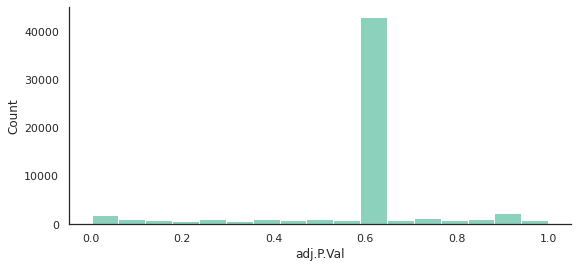

In [26]:
#looking to all values for significant adj.P.Val
sns.histplot(data=deg_data,x="adj.P.Val")
sns.despine()

<AxesSubplot:xlabel='logFC', ylabel='adj.P.Val'>

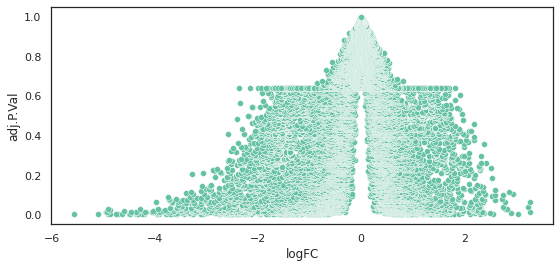

In [27]:
## searching for log2 fold change profile in control and treatment samples considering values 
## with significant P.Val
sns.scatterplot(data=deg_data, x="logFC",y="adj.P.Val")

In [28]:
### Interpretation ###
## It is possible to observe a diference in the profile between control and treatment. That, lead us 
## to conclude that, even until unknown the reasons behind, treatment has an influence in fold change

<AxesSubplot:xlabel='logFC', ylabel='AveExpr'>

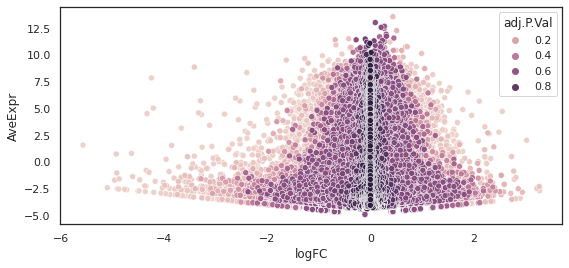

In [29]:
# searching for correlation between Avarage expression and fold change.
# it is needed to remember that the expression avarage is calculated among all samples while fold change
# Compares values between Treatment X Control. So them can not lead us to a global conclusions
# But could give us an idea. 

sns.scatterplot(data=deg_data, x="logFC",y="AveExpr", hue="adj.P.Val")

In [30]:
### Interpretation ###
## the treatment is making a subset of gene (x-axis -6 and -4) with low folding ratio be more downexpressed.

<AxesSubplot:xlabel='logFC', ylabel='AveExpr'>

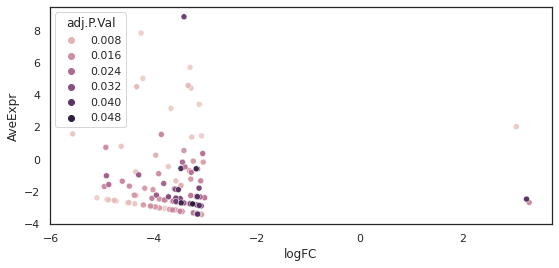

In [31]:
sns.scatterplot(data=logFC_subset, x="logFC",y="AveExpr", hue="adj.P.Val")

In [32]:
##Picking the gene with low log2 fold change
logFC_subset.min()

genes        ENSG00000064205
logFC               -5.57745
AveExpr             -3.44042
t                   -32.5407
P.Value          1.01641e-07
adj.P.Val         0.00185813
B                  -0.764771
dtype: object

In [33]:
### Hypothesis: Treatment has an influence on relevant genes in the context of cancer.

In [34]:
### Confirm (or infirm your hypothesis) 

### ENSG00000064205 gene is comprised into WNT pathway and plays a role as growth factor 
### (ref: https://www.bcgsc.ca/people/malachig/htdocs/alexa_platform/alexa_seq/FL_Tx/genes/chr20_2/ENSG00000064205.htm).
### WNT is a common pathway misregulated in cancer desease (ref: https://www.nature.com/articles/onc2016304).
### With this low log fold change value and the other graphs, it possible to conclude that the treatment
## possibly have impact in crucial genes for cancer management.